<a href="https://colab.research.google.com/github/MLGus/metricas/blob/main/Metricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cálculo de Métricas de Avaliação de Aprendizado

Formato do conjunto de treino: (60000, 28, 28, 1), Rótulos: (60000,)
Formato do conjunto de teste: (10000, 28, 28, 1), Rótulos: (10000,)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 60s - 32ms/step - accuracy: 0.9519 - loss: 0.1566 - val_accuracy: 0.9859 - val_loss: 0.0425
Epoch 2/5
1875/1875 - 58s - 31ms/step - accuracy: 0.9845 - loss: 0.0508 - val_accuracy: 0.9835 - val_loss: 0.0466
Epoch 3/5
1875/1875 - 83s - 44ms/step - accuracy: 0.9895 - loss: 0.0340 - val_accuracy: 0.9891 - val_loss: 0.0366
Epoch 4/5
1875/1875 - 82s - 44ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.9916 - val_loss: 0.0266
Epoch 5/5
1875/1875 - 79s - 42ms/step - accuracy: 0.9929 - loss: 0.0212 - val_accuracy: 0.9915 - val_loss: 0.0261


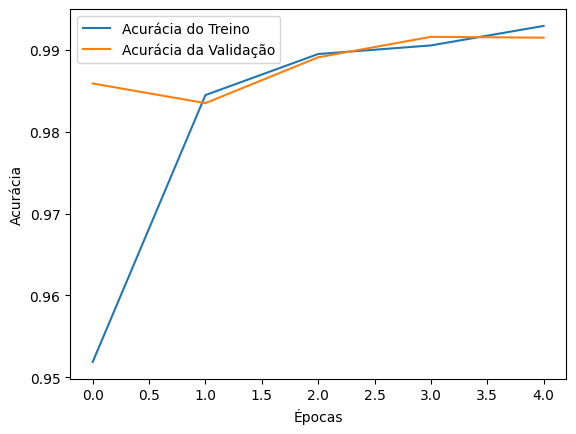

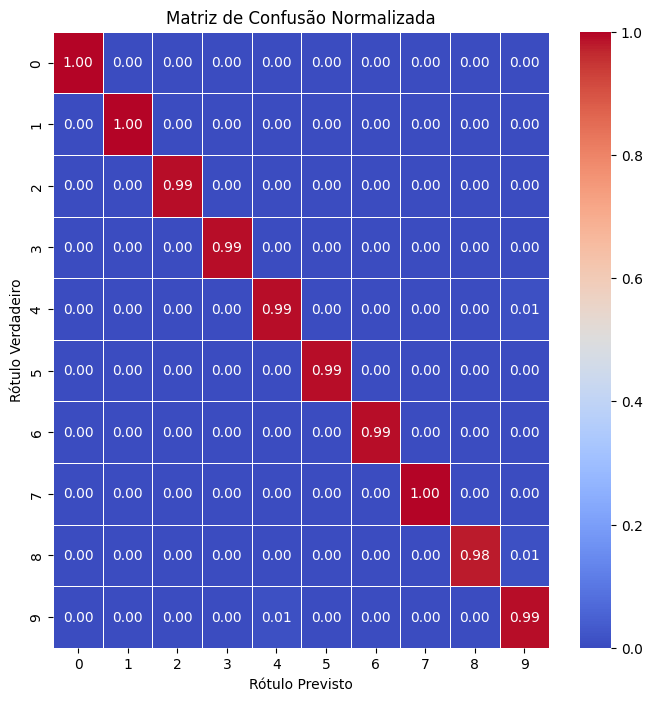

Sensibilidade (Recall): [0.99693878 0.99735683 0.99224806 0.99405941 0.99083503 0.99327354
 0.98538622 0.99513619 0.98049281 0.98810704]
-----------------------
Especificidade: [0.99955654 0.99898477 0.99933095 0.99922136 0.99889111 0.99890206
 0.99977881 0.99877396 0.99955684 0.99755311]
-----------------------
Acurácia: [0.9993 0.9988 0.9986 0.9987 0.9981 0.9984 0.9984 0.9984 0.9977 0.9966]
-----------------------
Precisão: [0.99592253 0.99211218 0.99417476 0.99307616 0.98982706 0.98883929
 0.99788584 0.9893617  0.99582899 0.97841021]
-----------------------
F-score: [0.99643039 0.99472759 0.99321048 0.99356754 0.99033079 0.99105145
 0.99159664 0.99224054 0.9881014  0.98323471]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import datasets, layers, models
import tensorflow as tf

# Carregar o dataset MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Redimensionar as imagens para adicionar a dimensão do canal (necessário para CNNs)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normalizar os valores dos pixels para o intervalo [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Definição das classes (opcional)
classes = list(range(10))  # Melhor maneira de definir [0,1,2,3,4,5,6,7,8,9]

# Verificar as formas dos conjuntos de dados
print(f"Formato do conjunto de treino: {train_images.shape}, Rótulos: {train_labels.shape}")
print(f"Formato do conjunto de teste: {test_images.shape}, Rótulos: {test_labels.shape}")

# Criar o modelo CNN
modelo = models.Sequential()

# Primeira camada convolucional + pooling
modelo.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
modelo.add(layers.MaxPooling2D((2, 2)))

# Segunda camada convolucional + pooling
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelo.add(layers.MaxPooling2D((2, 2)))

# Terceira camada convolucional
modelo.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Achatar as camadas e adicionar as camadas densas
modelo.add(layers.Flatten())
modelo.add(layers.Dense(64, activation='relu'))
modelo.add(layers.Dense(10, activation='softmax'))  # 10 classes (dígitos de 0 a 9)

# Compilar o modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Exibir a estrutura do modelo
modelo.summary()

# Define the log directory for TensorBoard
logdir = "logs"

# Criar o callback do TensorBoard
tensorflow_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1)

# Compilar o modelo
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Treinar o modelo com o callback do TensorBoard
history = modelo.fit(x=train_images,
                     y=train_labels,
                     epochs=5,
                     batch_size=32,
                     validation_data=(test_images, test_labels),
                     callbacks=[tensorflow_callback],
                     verbose=2)

# Plotar a acurácia do treino e validação
plt.plot(history.history['accuracy'], label='Acurácia do Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia da Validação')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Prever as classes para os dados de teste
y_true = test_labels
y_pred = np.argmax(modelo.predict(test_images, batch_size=32, verbose=0), axis=-1)

# Criar a matriz de confusão
com_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()

# Normalizar a matriz de confusão para obter proporções
com_mat_norm = np.around(com_mat.astype('float') / com_mat.sum(axis=1)[:, np.newaxis], decimals=2)
com_mat_norm = np.nan_to_num(com_mat_norm)  # Corrige divisões por zero

# Criar um DataFrame para facilitar a visualização
com_mat_df = pd.DataFrame(com_mat_norm, index=classes, columns=classes)

# Criar o heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(com_mat_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Ajustar rótulos
plt.title("Matriz de Confusão Normalizada")
plt.ylabel("Rótulo Verdadeiro")
plt.xlabel("Rótulo Previsto")
plt.show()

# Cálculo das métricas
def calcular_metricas(confusion_matrix):
    VP = np.diag(confusion_matrix)
    FN = np.sum(confusion_matrix, axis=1) - VP
    FP = np.sum(confusion_matrix, axis=0) - VP
    VN = np.sum(confusion_matrix) - (VP + FN + FP)

    N = np.sum(confusion_matrix)

    sensibilidade = VP / (VP + FN)
    especificidade = VN / (FP + VN)
    acuracia = (VP + VN) / N
    precisao = VP / (VP + FP)
    f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)

    return sensibilidade, especificidade, acuracia, precisao, f_score

# Calcular as métricas para cada classe
sensibilidade, especificidade, acuracia, precisao, f_score = calcular_metricas(com_mat)

# Exibir as métricas
print("Sensibilidade (Recall):", sensibilidade)
print("-----------------------")
print("Especificidade:", especificidade)
print("-----------------------")
print("Acurácia:", acuracia)
print("-----------------------")
print("Precisão:", precisao)
print("-----------------------")
print("F-score:", f_score)